In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
PL = pd.read_csv('', header=0)
PT = pd.read_csv('', header=0)
FT = pd.read_csv('', header=0)

In [21]:
print(PL)

    precision    recall  f1_score
0    0.681880  0.570790  0.621409
1    0.699701  0.311388  0.430978
2    0.644847  0.463997  0.539674
3    0.536522  0.131341  0.211024
4    0.123738  0.079531  0.096827
5    0.120779  0.764718  0.208611
6    0.593587  0.745843  0.661061
7    0.000000  0.000000  0.000000
8    0.263886  0.793270  0.396030
9    0.643370  0.841219  0.729111
10   0.756562  0.518109  0.615031
11   0.878763  0.359512  0.510268
12   0.000000  0.000000  0.000000
13   0.000000  0.000000  0.000000
14   0.799409  0.858277  0.827798
15   0.622120  0.846050  0.717008
16   0.868943  0.934084  0.900337
17   0.597390  0.769299  0.672533
18   0.643469  0.582066  0.611229
19   0.000000  0.000000  0.000000
20   0.332181  0.478261  0.392056
21   0.718825  0.942632  0.815655
22   0.000000  0.000000  0.000000
23   0.137341  0.198469  0.162341
24   0.422279  0.188253  0.260413
25   0.449811  0.128901  0.200379


In [16]:
data = [PL, PT, FT]
experiment_labels = ["PL", "PT", "PT + FT"]
metrics = PL.columns 

In [19]:
print(data)

[    precision    recall  f1_score
0    0.681880  0.570790  0.621409
1    0.699701  0.311388  0.430978
2    0.644847  0.463997  0.539674
3    0.536522  0.131341  0.211024
4    0.123738  0.079531  0.096827
5    0.120779  0.764718  0.208611
6    0.593587  0.745843  0.661061
7    0.000000  0.000000  0.000000
8    0.263886  0.793270  0.396030
9    0.643370  0.841219  0.729111
10   0.756562  0.518109  0.615031
11   0.878763  0.359512  0.510268
12   0.000000  0.000000  0.000000
13   0.000000  0.000000  0.000000
14   0.799409  0.858277  0.827798
15   0.622120  0.846050  0.717008
16   0.868943  0.934084  0.900337
17   0.597390  0.769299  0.672533
18   0.643469  0.582066  0.611229
19   0.000000  0.000000  0.000000
20   0.332181  0.478261  0.392056
21   0.718825  0.942632  0.815655
22   0.000000  0.000000  0.000000
23   0.137341  0.198469  0.162341
24   0.422279  0.188253  0.260413
25   0.449811  0.128901  0.200379,     precision    recall  f1_score
0    0.713560  0.705985  0.709752
1    0.72463

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (26,) and arg 1 with shape (25,).

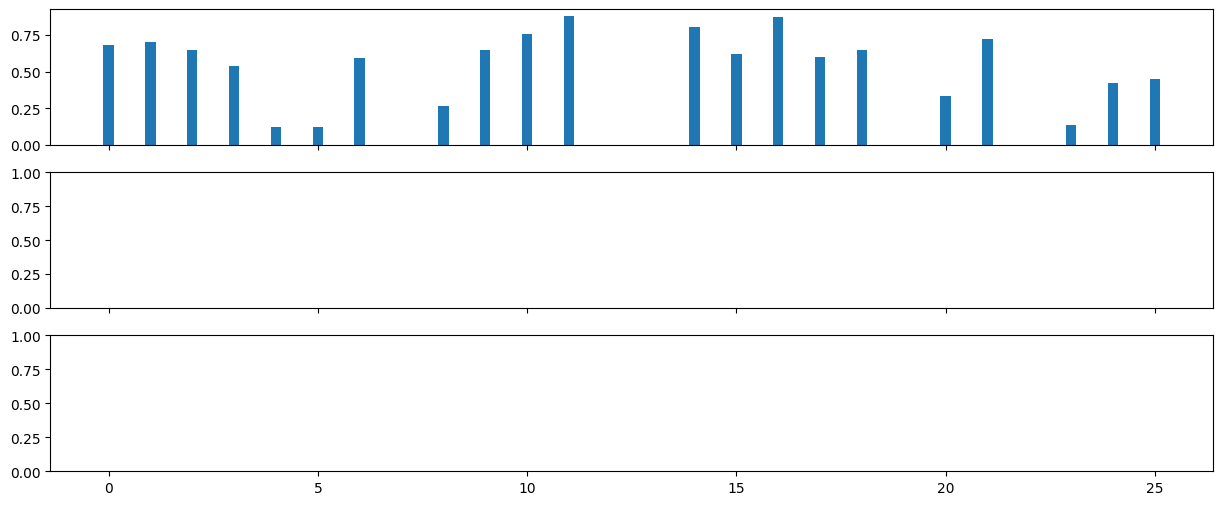

In [17]:
num_classes = len(PL)
num_metrics = len(metrics)
fig, axes = plt.subplots(num_metrics, 1, figsize=(5 * num_metrics, 6), sharex=True)

bar_width = 0.25
x = np.arange(num_classes)

for i, metric in enumerate(metrics):
    for j, exp in enumerate(data):
        axes[i].bar(x + j * bar_width, exp[metric], width=bar_width, label=experiment_labels[j])

    axes[i].set_title(metric)
    axes[i].set_xlabel("Class")
    axes[i].set_xticks(x + bar_width)
    axes[i].set_xticklabels([f"Class {k+1}" for k in range(num_classes)])
    # axes[i].legend(title="Experiment")
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()